In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
from graph_combination import GraphCombination
from gensim.models import KeyedVectors
import helper

# Ontology Embeddings (Task Vector)

## Subtask Vector.1

### Graphs concentration

In [3]:
# We will perform graphs concentration
graph_paths = [
    "../cw_onto/pizza-restaurants-ontology.ttl",
    "../task_rdf/pizza_restaurant.ttl"
]

output_path = "concentrated_graph.owl"

concentrated_graph = GraphCombination(_graph_paths=graph_paths, _output_path=output_path)
print("Concentrated graph created: {}".format(concentrated_graph.combination_and_save(_output_format="xml")))

Concentrated graph created: concentrated_graph.owl


### Run OWL2Vec

`cd OWL2Vec-Star-master/`
`owl2vec_star standalone --config_file ../owl2vec_config/config_1.cfg`
`owl2vec_star standalone --config_file ../owl2vec_config/config_2.cfg`
`owl2vec_star standalone --config_file ../owl2vec_config/config_3.cfg`

The configuration was modified from default configuration
#### config_1.cfg
`iteration = 15`

#### config_2.cfg
`axiom_reasoner = hermit`
`iteration = 20`

#### config_3.cfg
`axiom_reasoner = elk`
`walk_depth = 5`
`iteration = 30`

### File savings
Binary and textual files saved to `owl2vec_embeddings`

## Subtask Vector.2

In [4]:
# First, we need to load output file from OWL2Vec
model = KeyedVectors.load("./owl2vec_embeddings/config_2_output/ontology.embeddings", mmap='r')
wv = model.wv

### 3 pairs with high similarity

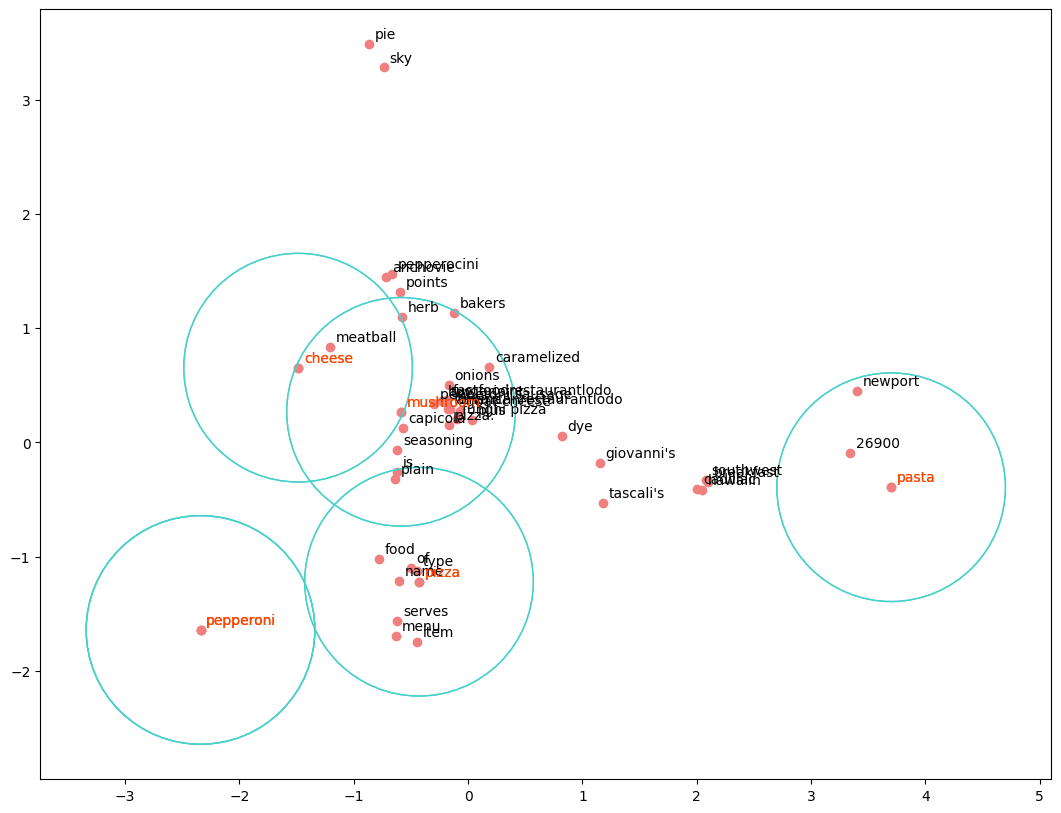

In [91]:
# We will compare similarity of
# "pizza" and "pepperoni"
term_pair_0 = ["pizza", "pepperoni"]
term_pair_1 = ["pasta", "pepperoni"]
term_pair_2 = ["mushroom", "cheese"]

term_pair = term_pair_0 + term_pair_1 + term_pair_2

model_2d, label = helper.dim_reduction(_model=model, _target_terms=term_pair, _topn=8, _n_dim=2)
helper.visualise_2d(p=model_2d, labels=label, circle_size=1,_target_terms=term_pair)

We can see that the "pizza" has a close similarity to "pepperoni", "mushroom" and "cheese" since all of them is ingredient in pizza while pasta has a high dissimilarity

### 3 pairs with high dissimilarity

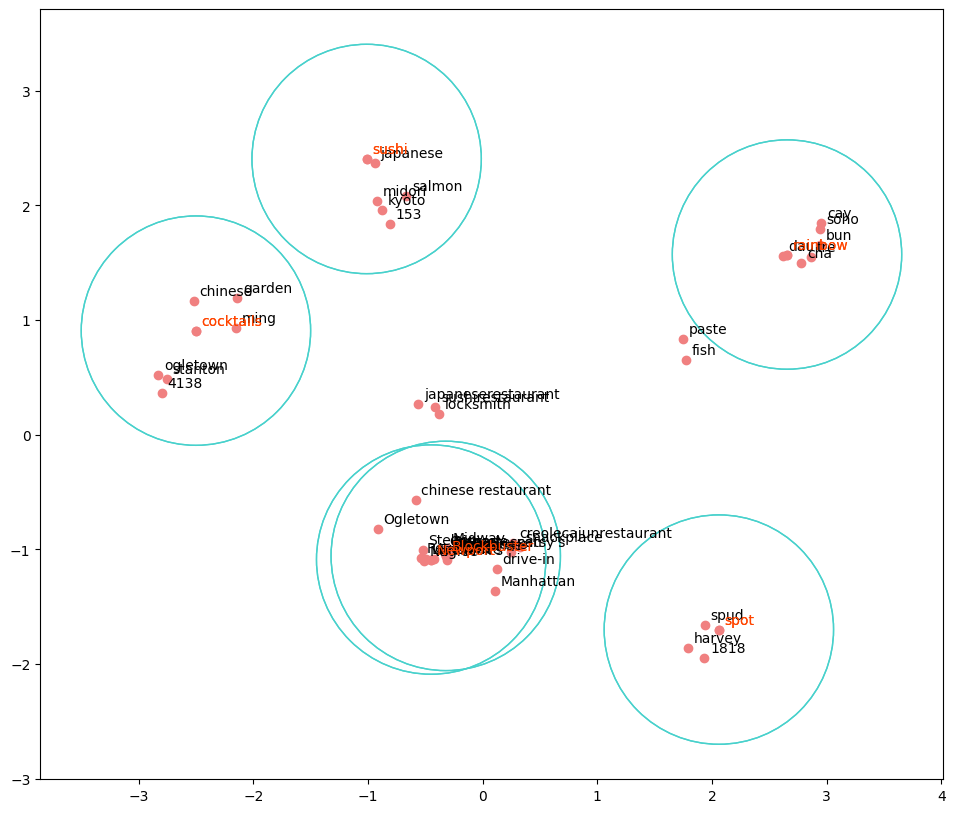

In [114]:
# We will compare similarity of
# "ingredient", "rainbow"
# "ingredient", "rainbow"
# "cocktails", "spot"
term_pair_0 = ["Blockbuster", "Newport"]
term_pair_1 = ["sushi", "rainbow"]
term_pair_2 = ["cocktails", "spot"]

term_pair = term_pair_0 + term_pair_1 + term_pair_2

model_2d, label = helper.dim_reduction(_model=model, _target_terms=term_pair, _topn=8, _n_dim=2)
helper.visualise_2d(p=model_2d, labels=label, circle_size=1,_target_terms=term_pair)

As shown in the graph: "rainbow", "sushi", "cocktails", "spot" have decent dissimilarity while "Blockbuster" and "Newport" are close since they might be the location name